In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.random.uniform(-3,3,size=100)
X=x.reshape(-1,1) #二维数组
y=0.5*x**2+x+2+np.random.normal(0,1,size=100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly=PolynomialFeatures(degree=2) # 添加最多几次幂
poly.fit(X)
X2=poly.transform(X)

In [5]:
X2.shape

(100, 3)

In [6]:
X2[:5,:]
# x的0次幂，1次幂，2次幂

array([[ 1.00000000e+00,  7.68875406e-01,  5.91169389e-01],
       [ 1.00000000e+00, -9.76830272e-04,  9.54197381e-07],
       [ 1.00000000e+00, -2.04694505e+00,  4.18998403e+00],
       [ 1.00000000e+00,  3.95370558e-01,  1.56317878e-01],
       [ 1.00000000e+00,  1.82437999e+00,  3.32836236e+00]])

In [8]:
X[:5,:]

array([[ 7.68875406e-01],
       [-9.76830272e-04],
       [-2.04694505e+00],
       [ 3.95370558e-01],
       [ 1.82437999e+00]])

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg2=LinearRegression()
lin_reg2.fit(X2,y)
y_predict2=lin_reg2.predict(X2)

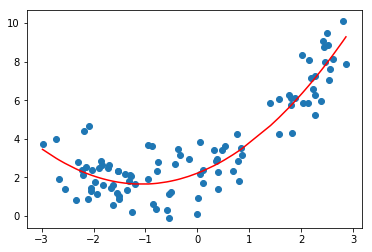

In [12]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color='r')
# 要将x排序，已经对排序的x进行索引
plt.show()

In [13]:
lin_reg2.coef_

array([0.        , 1.05529514, 0.49243136])

In [14]:
lin_reg2.intercept_

2.219397688257117

### 关于PolynomialFeatures

In [15]:
X=np.arange(1,11).reshape(-1,2)

In [16]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [17]:
poly=PolynomialFeatures(degree=2)
poly.fit(X)
X2=poly.transform(X)

In [18]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [19]:
poly=PolynomialFeatures(degree=3)
poly.fit(X)
X3=poly.transform(X)

In [21]:
X3.shape

(5, 10)

### pipeline

In [22]:
x=np.random.uniform(-3,3,size=100)
X=x.reshape(-1,1) #二维数组
y=0.5*x**2+x+2+np.random.normal(0,1,size=100)

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg=Pipeline([
    ("poly",PolynomialFeatures(degree=2)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
])

### 将三步合为一步

In [26]:
poly_reg.fit(X,y)
y_predict=poly_reg.predict(X)

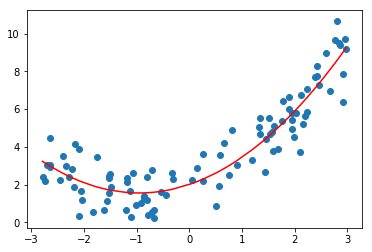

In [27]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')
# 要将x排序，已经对排序的x进行索引
plt.show()